In [32]:
%pylab inline
import SimpleITK as sitk
import numpy as np
from scipy.ndimage import gaussian_filter
from copy import deepcopy

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [33]:
def region_growing(image, seed,threshold):
    region=np.zeros_like(image)   
    # Creo una matrice di booleani che indica quali pixel soddisfano il criterio 
    mask=np.abs(image-seed)<=threshold 
    region[mask]=image[mask]
    #assegno gli elementi dell'immagine che si trovano in corrispondenza dei true, alla regione di zeri
    return region


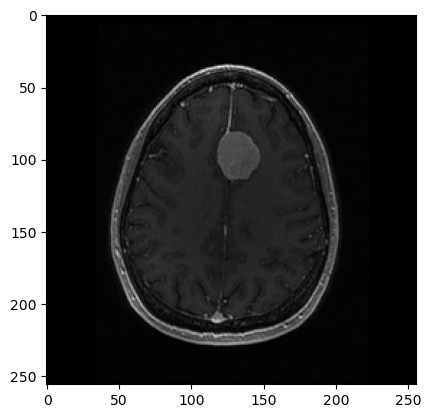

In [41]:
import SimpleITK as sitk
import numpy as np

# Carico il file NRRD
brain_sitk=sitk.ReadImage("DATA/MRBrainTumor1.nrrd")
# Ottengo l'array NumPy dall'immagine

brain_array = sitk.GetArrayFromImage(brain_sitk)
brain_72=brain_array[72,:,:]
imshow(brain_72,cmap="gray") #immagine normale
#brain_sitk.GetSize()
#brain_array.shape 

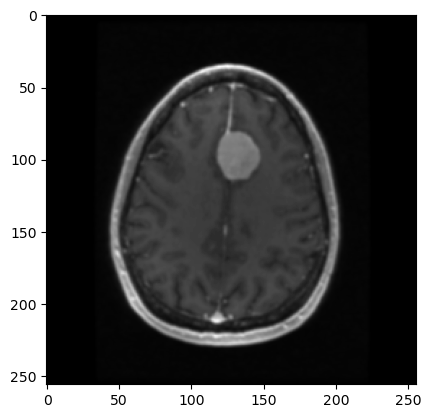

In [42]:
smoothed_brain = gaussian_filter(brain_72, sigma=1)
imshow(smoothed_brain,cmap="gray")#immagine filtrata


In [43]:
brain_sm=smoothed_brain #creo una variabile a cui assegno l'immagine "smooth"

In [44]:
#seed=brain_sitk.GetPixel(132,92,72) (x,y,z)
seed=brain_sm[92,132] #ottengo il valore di intensità pixel seed posizionato in prossimità
                      #del centro della massa (z,y,x)
seed

183

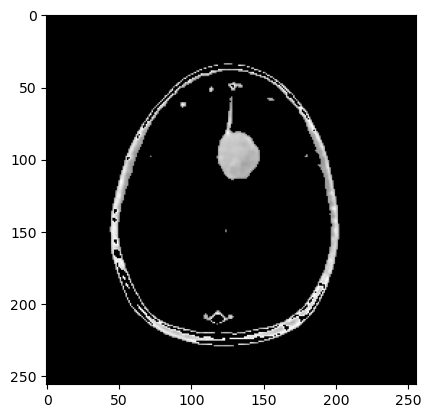

In [45]:
# Applica l'algoritmo di region growing fornisco al metodo l'immagine da segmentare, il seed e la soglia 
brain_segmentato=region_growing(brain_sm, seed,50)
imshow(brain_segmentato,cmap="gray")